# P8. Star Wars Survey

In this project we will be analyzing 835 responses from a survey data regarding one of the famous Star Wars franchise. We will be cleaning and exploring this dataset in order to answer the question if users believe that 'The Empire Strikes Back' is clearly the best of all the movies in the franchise.

In [145]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

star_wars.head(10)
star_wars.columns

#Removing columns where RespondentID is NaN.
star_wars = star_wars[star_wars['RespondentID'].notnull()]
star_wars.head()


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


** Converting String Columns into Boolean Values **

In [146]:
yes_no = {'Yes':True, 'No':False}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)

1        True
2       False
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12      False
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26      False
27       True
28       True
29       True
30       True
        ...  
1157     True
1158    False
1159     True
1160    False
1161     True
1162     True
1163     True
1164     True
1165     True
1166     True
1167     True
1168     True
1169    False
1170     True
1171    False
1172     True
1173     True
1174     True
1175     True
1176     True
1177     True
1178     True
1179    False
1180     True
1181     True
1182     True
1183     True
1184    False
1185     True
1186     True
Name: Have you seen any of the 6 films in the Star Wars franchise?, Length: 1186, dtype: bool

In [147]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)



1        True
2         NaN
3       False
4        True
5        True
6        True
7        True
8        True
9        True
10      False
11        NaN
12        NaN
13      False
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22      False
23       True
24       True
25       True
26        NaN
27       True
28       True
29       True
30       True
        ...  
1157    False
1158      NaN
1159    False
1160      NaN
1161    False
1162    False
1163     True
1164    False
1165    False
1166     True
1167     True
1168    False
1169      NaN
1170     True
1171      NaN
1172     True
1173     True
1174     True
1175    False
1176     True
1177    False
1178    False
1179      NaN
1180     True
1181     True
1182     True
1183     True
1184      NaN
1185     True
1186    False
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, Length: 1186, dtype: object

In [148]:
#In this section we are exploring which movies from the Star Wars Franchise has the user seen
import numpy as np

movies = star_wars.columns[3:9]
movies_clean = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
     np.nan: False
}

for col in movies:
    star_wars[col] = star_wars[col].map(movies_clean)
#star_wars['Which of the following Star Wars films have you seen? Please select all that apply.'] = star_wars['Which of the following Star Wars films have you seen? Please select all that apply.'].map(movies_clean)

col_clean = {
    'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
    'Unnamed: 4':'seen_2',
    'Unnamed: 5':'seen_3',
    'Unnamed: 6':'seen_4',
    'Unnamed: 7':'seen_5',
    'Unnamed: 8':'seen_6',
    np.nan:False  
}

star_wars = star_wars.rename(columns=col_clean)

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [149]:
#In this section we will be exploring how a user ranks all the movies from the franchise
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

col_clean2 = {
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1',
    'Unnamed: 10':'ranking_2',
    'Unnamed: 11':'ranking_3',
    'Unnamed: 12':'ranking_4',
    'Unnamed: 13':'ranking_5',
    'Unnamed: 14':'ranking_6'
}

star_wars = star_wars.rename(columns=col_clean2)
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


# Finding highest-ranked Movie

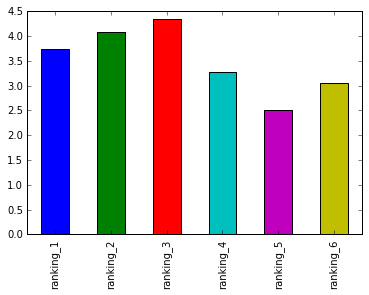

In [150]:
ranking_mean = star_wars[star_wars.columns[9:15]].mean(axis='index')

%matplotlib inline
import matplotlib.pyplot as plt

ranking_mean.plot(kind='bar')
plt.show()


Users scored the movies from 1-10, 1 being the best. We calculated the ranking means for each of the movies, the lower the means the better the movie. From the previous bar chart, we can see that **'Star Wars: Episode V The Empire Strikes Back'** is scored as the best movie from the franchise.

# Analyzing # of users who have seen a particular movie from the franchise

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64


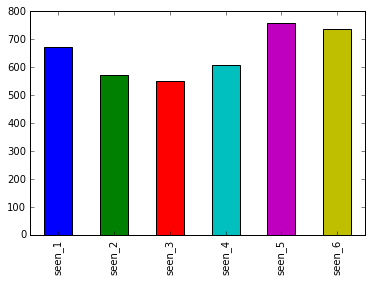

In [151]:
seen = ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']

count_users = star_wars[seen].sum(axis='index')

print(count_users)
count_users.plot(kind='bar')
plt.show()

From the previous bar plot, we can see that most people in this survey watched:
    - Star Wars: Episode I  The Phantom Menace
    - Star Wars: Episode V The Empire Strikes Back
    - Star Wars: Episode VI Return of the Jedi


# Understanding User Response by Gender

In [157]:
#splitting data into males and females

male_data = star_wars[star_wars['Gender']=='Male']
female_data = star_wars[star_wars['Gender']=='Female']



**View Count and Moving Ranking by Gender **


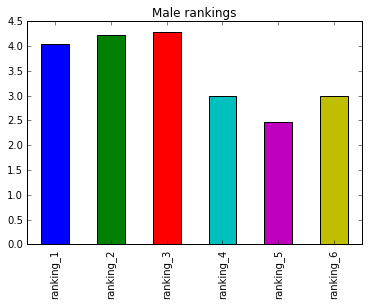

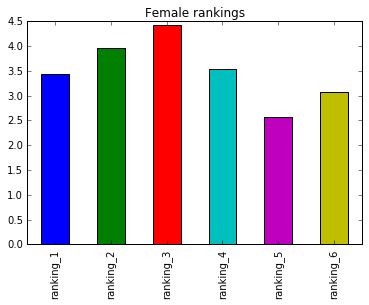

In [176]:
gender_data = [male_data, female_data]
%matplotlib inline
import matplotlib.pyplot as plt

for d in gender_data:
    ranking_mean = d[d.columns[9:15]].mean(axis='index')
    ranking_mean.plot(kind='bar')
    if d.equals(male_data):
        plt.title('Male rankings')
    else:
        plt.title('Female rankings')
    plt.show()

From the two bar plots above we see that both genders ranked *Star Wars: Episode V The Empire Strikes Back* as the best movie from the franchise and *Star Wars: Episode III Revenge of the Sith* as the worst.

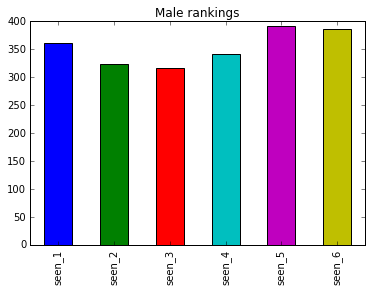

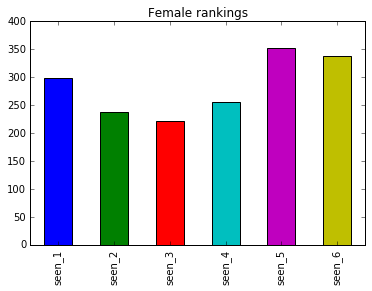

In [177]:
seen = ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']


for d in gender_data:
    count_users = d[seen].sum(axis='index')
    count_users.plot(kind='bar')
    if d.equals(male_data):
        plt.title('Male rankings')
    else:
        plt.title('Female rankings')
    plt.show()

From the two bar plots above, we see that *Star Wars: Episode V The Empire Strikes Back* is the most popular movie in by both genders. In addition, although more males watched *Star Wars: Episode III Revenge of the Sith as the worst* they liked it less than females.